# Problem Types

**Dimensionality of the problem**: The dimensionality of the problem, i.e. the number of scalar variables on which the search is performed, pretty much determines the scale of an optimization problem.

**Convex vs. non-convex**: It is simple to optimize convex functions. It can be difficult to optimize non-convex functions. It is possible to demonstrate that a local minimum is also a global minimum for a convex function. The minimum is hence, in some ways, unique. For two point A, B, f(C) lies below the segment [f(A), f(B)], if A < C < B

**Smooth vs. non-smooth**: For a smooth fucntion, the gradient is a continuous function that is defined everywhere. Smooth function optimization is simpler (true in the context of black-box optimization, otherwise Linear Programming is an example of methods which deal very efficiently with piece-wise linear functions).

**Noisy vs. non-noisy/exact**: Many optimization approaches rely on objective function gradients. If the gradient function is not specified, they are computed numerically, which results in mistakes. Even though the objective function is not noisy in this case, a gradient-based optimization may be a noisy optimization.

## Convex function 

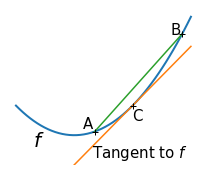

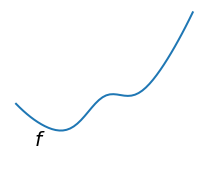

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 2)

plt.figure(1, figsize=(3, 2.5))
plt.clf()

# A convex function
plt.plot(x, x**2, linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)

# The tangent in one point
plt.plot(x, 2*x - 1)
plt.plot(1, 1, 'k+')
plt.text(.3, -.75, "Tangent to $f$", size=15)
plt.text(1, 1 - .5, 'C', size=15)

# Convexity as barycenter
plt.plot([.35, 1.85], [.35**2, 1.85**2])
plt.plot([.35, 1.85], [.35**2, 1.85**2], 'k+')
plt.text(.35 - .2, .35**2 + .1, 'A', size=15)
plt.text(1.85 - .2, 1.85**2, 'B', size=15)

plt.ylim(ymin=-1)
plt.axis('off')
plt.tight_layout()

# Convexity as barycenter
plt.figure(2, figsize=(3, 2.5))
plt.clf()
plt.plot(x, x**2 + np.exp(-5*(x - .5)**2), linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)

plt.ylim(ymin=-1)
plt.axis('off')
plt.tight_layout()
plt.show()

## Smooth vs non-smooth 

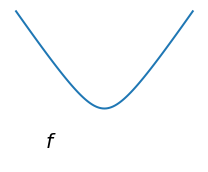

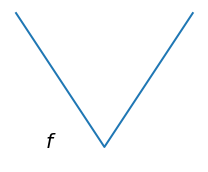

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.5, 1.5, 101)

# A smooth function
plt.figure(1, figsize=(3, 2.5))
plt.clf()

plt.plot(x, np.sqrt(.2 + x**2), linewidth=2)
plt.text(-1, 0, '$f$', size=20)

plt.ylim(ymin=-.2)
plt.axis('off')
plt.tight_layout()

# A non-smooth function
plt.figure(2, figsize=(3, 2.5))
plt.clf()
plt.plot(x, np.abs(x), linewidth=2)
plt.text(-1, 0, '$f$', size=20)

plt.ylim(ymin=-.2)
plt.axis('off')
plt.tight_layout()
plt.show()

## Noisy optimization problem 

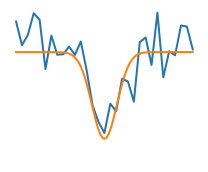

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x = np.linspace(-5, 5, 101)
x_ = np.linspace(-5, 5, 31)

def f(x):
    return -np.exp(-x**2)

# A smooth function
plt.figure(1, figsize=(3, 2.5))
plt.clf()

plt.plot(x_, f(x_) + .2*np.random.normal(size=31), linewidth=2)
plt.plot(x, f(x), linewidth=2)

plt.ylim(ymin=-1.3)
plt.axis('off')
plt.tight_layout()
plt.show()

##  Constraint optimization: visualizing the geometry
A small figure explaining optimization with constraints

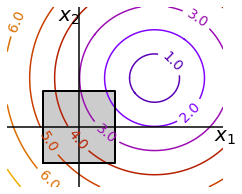

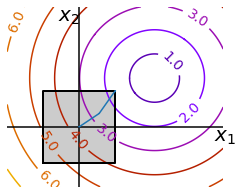

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

for i in (1, 2):
    # Create 2 figure: only the second one will have the optimization
    # path
    plt.figure(i, figsize=(3, 2.5))
    plt.clf()
    plt.axes([0, 0, 1, 1])

    contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                        extent=[-3, 6, -2.5, 5],
                        cmap=plt.cm.gnuplot)
    plt.clabel(contours,
            inline=1,
            fmt='%1.1f',
            fontsize=14)
    plt.plot([-1.5, -1.5,  1.5,  1.5, -1.5],
            [-1.5,  1.5,  1.5, -1.5, -1.5], 'k', linewidth=2)
    plt.fill_between([ -1.5,  1.5],
                    [ -1.5, -1.5],
                    [  1.5,  1.5],
                    color='.8')
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')

    plt.text(-.9, 4.4, '$x_2$', size=20)
    plt.text(5.6, -.6, '$x_1$', size=20)
    plt.axis('equal')
    plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
    return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

optimize.minimize(f, np.array([0, 0]), method="L-BFGS-B",
                     bounds=((-1.5, 1.5), (-1.5, 1.5)))

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

plt.show()

## Brent's method

Illustration of 1D optimization: Brent's method

Brent’s method on a non-convex function: note that the fact that the optimizer avoided the local minimum is a matter of luck. You can use different solvers using the parameter method and scipy.optimize.minimize_scalar() can also be used for optimization constrained to an interval using the parameter bounds.

Converged at  6
Converged at  23


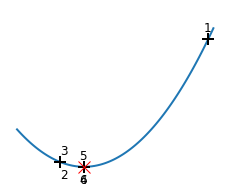

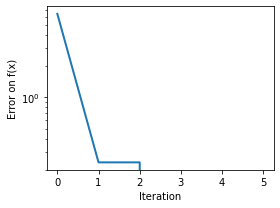

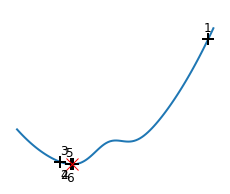

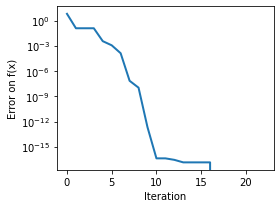

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = np.linspace(-1, 3, 100)
x_0 = np.exp(-1)

def f(x):
    return (x - x_0)**2 + epsilon*np.exp(-5*(x - .5 - x_0)**2)

for epsilon in (0, 1):
    plt.figure(figsize=(3, 2.5))
    plt.axes([0, 0, 1, 1])

    # A convex function
    plt.plot(x, f(x), linewidth=2)

    # Apply brent method. To have access to the iteration, do this in an
    # artificial way: allow the algorithm to iter only once
    all_x = list()
    all_y = list()
    for iter in range(30):
        result = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Brent",
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)
        if result.success:
            print('Converged at ', iter)
            break

        this_x = result.x
        all_x.append(this_x)
        all_y.append(f(this_x))
        if iter < 6:
            plt.text(this_x - .05*np.sign(this_x) - .05,
                    f(this_x) + 1.2*(.3 - iter % 2), iter + 1,
                    size=12)

    plt.plot(all_x[:10], all_y[:10], 'k+', markersize=12, markeredgewidth=2)

    plt.plot(all_x[-1], all_y[-1], 'rx', markersize=12)
    plt.axis('off')
    plt.ylim(ymin=-1, ymax=8)

    plt.figure(figsize=(4, 3))
    plt.semilogy(np.abs(all_y - all_y[-1]), linewidth=2)
    plt.ylabel('Error on f(x)')
    plt.xlabel('Iteration')
    plt.tight_layout()

plt.show()

## Gradient descent 

An example demoing gradient descent by creating figures that trace the
evolution of the optimizer.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

import sys, os
sys.path.append(os.path.abspath('helper'))
#from cost_functions import mk_quad, mk_gauss, rosenbrock,\
    #rosenbrock_prime, rosenbrock_hessian, LoggingFunction,\
    #CountingFunction

x_min, x_max = -1, 2
y_min, y_max = 2.25/3*x_min - .2, 2.25/3*x_max - .2

In [23]:
def rosenbrock(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def rosenbrock_hessian(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

def rosenbrock_prime(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

def mk_quad(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def mk_gauss(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

def LoggingFunction(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

def CountingFunction(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

A formatter to print values on contours

In [24]:
def super_fmt(value):
    if value > 1:
        if np.abs(int(value) - value) < .1:
            out = '$10^{%.1i}$' % value
        else:
            out = '$10^{%.1f}$' % value
    else:
        value = np.exp(value - .01)
        if value > .1:
            out = '%1.1f' % value
        elif value > .01:
            out = '%.2f' % value
        else:
            out = '%.2e' % value
    return out

A gradient descent algorithm do not use: its a toy, use scipy's optimize.fmin_cg

In [25]:
def gradient_descent(x0, f, f_prime, hessian=None, adaptative=False):
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    for i in range(1, 100):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if adaptative:
            # Compute a step size using a line_search to satisfy the Wolf
            # conditions
            step = optimize.line_search(f, f_prime,
                                np.r_[x_i, y_i], -np.r_[dx_i, dy_i],
                                np.r_[dx_i, dy_i], c2=.05)
            step = step[0]
            if step is None:
                step = 0
        else:
            step = 1
        x_i += - step*dx_i
        y_i += - step*dy_i
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i


def gradient_descent_adaptative(x0, f, f_prime, hessian=None):
    return gradient_descent(x0, f, f_prime, adaptative=True)


def conjugate_gradient(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, jac=f_prime, method="CG", callback=store, options={"gtol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def newton_cg(x0, f, f_prime, hessian):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="Newton-CG", jac=f_prime, hess=hessian, callback=store, options={"xtol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def bfgs(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="BFGS", jac=f_prime, callback=store, options={"gtol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def powell(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="Powell", callback=store, options={"ftol": 1e-12})
    return all_x_i, all_y_i, all_f_i


def nelder_mead(x0, f, f_prime, hessian=None):
    all_x_i = [x0[0]]
    all_y_i = [x0[1]]
    all_f_i = [f(x0)]
    def store(X):
        x, y = X
        all_x_i.append(x)
        all_y_i.append(y)
        all_f_i.append(f(X))
    optimize.minimize(f, x0, method="Nelder-Mead", callback=store, options={"ftol": 1e-12})
    return all_x_i, all_y_i, all_f_i

Run different optimizers on these problems

In [26]:
levels = dict()

for index, ((f, f_prime, hessian), optimizer) in enumerate((
                (mk_quad(.7), gradient_descent),
                (mk_quad(.7), gradient_descent_adaptative),
                (mk_quad(.02), gradient_descent),
                (mk_quad(.02), gradient_descent_adaptative),
                (mk_gauss(.02), gradient_descent_adaptative),
                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
                                    gradient_descent_adaptative),
                (mk_gauss(.02), conjugate_gradient),
                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
                                    conjugate_gradient),
                (mk_quad(.02), newton_cg),
                (mk_gauss(.02), newton_cg),
                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
                                    newton_cg),
                (mk_quad(.02), bfgs),
                (mk_gauss(.02), bfgs),
                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
                            bfgs),
                (mk_quad(.02), powell),
                (mk_gauss(.02), powell),
                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
                            powell),
                (mk_gauss(.02), nelder_mead),
                ((rosenbrock, rosenbrock_prime, rosenbrock_hessian),
                            nelder_mead),
            )):

    # Compute a gradient-descent
    x_i, y_i = 1.6, 1.1
    counting_f_prime = CountingFunction(f_prime)
    counting_hessian = CountingFunction(hessian)
    logging_f = LoggingFunction(f, counter=counting_f_prime.counter)
    all_x_i, all_y_i, all_f_i = optimizer(np.array([x_i, y_i]),
                                          logging_f, counting_f_prime,
                                          hessian=counting_hessian)

    # Plot the contour plot
    if not max(all_y_i) < y_max:
        x_min *= 1.2
        x_max *= 1.2
        y_min *= 1.2
        y_max *= 1.2
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    x = x.T
    y = y.T

    plt.figure(index, figsize=(3, 2.5))
    plt.clf()
    plt.axes([0, 0, 1, 1])

    X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
    z = np.apply_along_axis(f, 0, X)
    log_z = np.log(z + .01)
    plt.imshow(log_z,
            extent=[x_min, x_max, y_min, y_max],
            cmap=plt.cm.gray_r, origin='lower',
            vmax=log_z.min() + 1.5*log_z.ptp())
    contours = plt.contour(log_z,
                        levels=levels.get(f, None),
                        extent=[x_min, x_max, y_min, y_max],
                        cmap=plt.cm.gnuplot, origin='lower')
    levels[f] = contours.levels
    plt.clabel(contours, inline=1,
                fmt=super_fmt, fontsize=14)

    plt.plot(all_x_i, all_y_i, 'b-', linewidth=2)
    plt.plot(all_x_i, all_y_i, 'k+')

    plt.plot(logging_f.all_x_i, logging_f.all_y_i, 'k.', markersize=2)

    plt.plot([0], [0], 'rx', markersize=12)


    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.draw()

    plt.figure(index + 100, figsize=(4, 3))
    plt.clf()
    plt.semilogy(np.maximum(np.abs(all_f_i), 1e-30), linewidth=2,
                label='# iterations')
    plt.ylabel('Error on f(x)')
    plt.semilogy(logging_f.counts,
                np.maximum(np.abs(logging_f.all_f_i), 1e-30),
                linewidth=2, color='g', label='# function calls')
    plt.legend(loc='upper right', frameon=True, prop=dict(size=11),
              borderaxespad=0, handlelength=1.5, handletextpad=.5)
    plt.tight_layout()
    plt.draw()

TypeError: 'float' object is not subscriptable

##  Plotting the comparison of optimizers
Plots the results from the comparison of optimizers.

In [27]:
import pickle
import sys

import numpy as np
import matplotlib.pyplot as plt

results = pickle.load(open(
    'helper/compare_optimizers_py%s.pkl' % sys.version_info[0],
    'rb'))
n_methods = len(list(results.values())[0]['Rosenbrock  '])
n_dims = len(results)

symbols = 'o>*Ds'

plt.figure(1, figsize=(10, 4))
plt.clf()

colors = plt.cm.nipy_spectral(np.linspace(0, 1, n_dims))[:, :3]

method_names = list(list(results.values())[0]['Rosenbrock  '].keys())
method_names.sort(key=lambda x: x[::-1], reverse=True)

for n_dim_index, ((n_dim, n_dim_bench), color) in enumerate(
            zip(sorted(results.items()), colors)):
    for (cost_name, cost_bench), symbol in zip(sorted(n_dim_bench.items()),
                    symbols):
        for method_index, method_name, in enumerate(method_names):
            this_bench = cost_bench[method_name]
            bench = np.mean(this_bench)
            plt.semilogy([method_index + .1*n_dim_index, ], [bench, ],
                    marker=symbol, color=color)

# Create a legend for the problem type
for cost_name, symbol in zip(sorted(n_dim_bench.keys()),
            symbols):
    plt.semilogy([-10, ], [0, ], symbol, color='.5',
            label=cost_name)

plt.xticks(np.arange(n_methods), method_names, size=11)
plt.xlim(-.2, n_methods - .5)
plt.legend(loc='best', numpoints=1, handletextpad=0, prop=dict(size=12),
          frameon=False)
plt.ylabel('# function calls (a.u.)')

# Create a second legend for the problem dimensionality
plt.twinx()

for n_dim, color in zip(sorted(results.keys()), colors):
    plt.plot([-10, ], [0, ], 'o', color=color,
            label='# dim: %i' % n_dim)
plt.legend(loc=(.47, .07), numpoints=1, handletextpad=0, prop=dict(size=12),
          frameon=False, ncol=2)
plt.xlim(-.2, n_methods - .5)

plt.xticks(np.arange(n_methods), method_names)
plt.yticks(())

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'helper/compare_optimizers_py3.pkl'

## Curve fitting

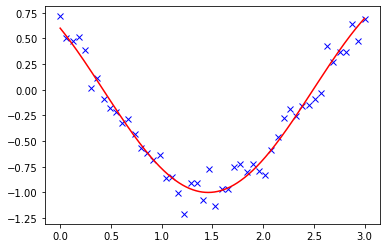

In [28]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

np.random.seed(0)

# Our test function
def f(t, omega, phi):
    return np.cos(omega * t + phi)

# Our x and y data
x = np.linspace(0, 3, 50)
y = f(x, 1.5, 1) + .1*np.random.normal(size=50)

# Fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = optimize.curve_fit(f, x, y)

# plot the data and the fitted curve
t = np.linspace(0, 3, 1000)

plt.figure(1)
plt.clf()
plt.plot(x, y, 'bx')
plt.plot(t, f(t, *params), 'r-')
plt.show()

## Optimization with constraints
An example showing how to do optimization with general constraints using SLSQP and cobyla.

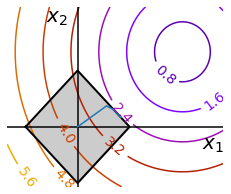

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.03:4.2:.04, -1.6:3.2:.04]
x = x.T
y = y.T

plt.figure(1, figsize=(3, 2.5))
plt.clf()
plt.axes([0, 0, 1, 1])

contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                    extent=[-2.03, 4.2, -1.6, 3.2],
                    cmap=plt.cm.gnuplot)
plt.clabel(contours,
        inline=1,
        fmt='%1.1f',
        fontsize=14)
plt.plot([-1.5,    0,  1.5,    0, -1.5],
        [   0,  1.5,    0, -1.5,    0], 'k', linewidth=2)
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
plt.axvline(0, color='k')
plt.axhline(0, color='k')

plt.text(-.9, 2.8, '$x_2$', size=20)
plt.text(3.6, -.6, '$x_1$', size=20)
plt.axis('tight')
plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

optimize.minimize(f, np.array([0, 0]), method="SLSQP",
                     constraints={"fun": constraint, "type": "ineq"})

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

plt.show()

## Alternating optimization
The challenge here is that Hessian of the problem is a very ill-conditioned matrix. This can easily be seen, as the Hessian of the first term in simply 2 x np.dot(K.T, K). Thus the conditioning of the problem can be judged from looking at the conditioning of K.

In [30]:
import time

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

np.random.seed(0)

K = np.random.normal(size=(100, 100))

def f(x):
    return np.sum((np.dot(K, x - 1))**2) + np.sum(x**2)**2


def f_prime(x):
    return 2*np.dot(np.dot(K.T, K), x - 1) + 4*np.sum(x**2)*x


def hessian(x):
    H = 2*np.dot(K.T, K) + 4*2*x*x[:, np.newaxis]
    return H + 4*np.eye(H.shape[0])*np.sum(x**2)

     Powell: time 0.21s
       BFGS: time 0.91s, x error 0.02, f error -0.02
     L-BFGS: time 0.07s, x error 0.02, f error -0.02
  BFGS w f': time 0.05s, x error 0.02, f error -0.02
L-BFGS w f': time 0.01s, x error 0.02, f error -0.02
     Newton: time 0.00s, x error 0.02, f error -0.02


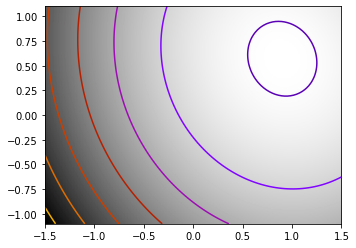

In [31]:
plt.figure(1)
plt.clf()
Z = X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]
# Complete in the additional dimensions with zeros
Z = np.reshape(Z, (2, -1)).copy()
Z.resize((100, Z.shape[-1]))
Z = np.apply_along_axis(f, 0, Z)
Z = np.reshape(Z, X.shape)
plt.imshow(Z.T, cmap=plt.cm.gray_r, extent=[-1.5, 1.5, -1.1, 1.1],
          origin='lower')
plt.contour(X, Y, Z, cmap=plt.cm.gnuplot)

# A reference but slow solution:
t0 = time.time()
x_ref = optimize.minimize(f, K[0], method="Powell").x
print('     Powell: time %.2fs' % (time.time() - t0))
f_ref = f(x_ref)

# Compare different approaches
t0 = time.time()
x_bfgs = optimize.minimize(f, K[0], method="BFGS").x
print('       BFGS: time %.2fs, x error %.2f, f error %.2f' % (time.time() - t0,
    np.sqrt(np.sum((x_bfgs - x_ref)**2)), f(x_bfgs) - f_ref))

t0 = time.time()
x_l_bfgs = optimize.minimize(f, K[0], method="L-BFGS-B").x
print('     L-BFGS: time %.2fs, x error %.2f, f error %.2f' % (time.time() - t0,
    np.sqrt(np.sum((x_l_bfgs - x_ref)**2)), f(x_l_bfgs) - f_ref))


t0 = time.time()
x_bfgs = optimize.minimize(f, K[0], jac=f_prime, method="BFGS").x
print("  BFGS w f': time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_bfgs - x_ref)**2)),
    f(x_bfgs) - f_ref))

t0 = time.time()
x_l_bfgs = optimize.minimize(f, K[0], jac=f_prime, method="L-BFGS-B").x
print("L-BFGS w f': time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_l_bfgs - x_ref)**2)),
    f(x_l_bfgs) - f_ref))

t0 = time.time()
x_newton = optimize.minimize(f, K[0], jac=f_prime, hess=hessian, method="Newton-CG").x
print("     Newton: time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_newton - x_ref)**2)),
    f(x_newton) - f_ref))

plt.show()

##  Finding a minimum in a flat neighborhood
An excercise of finding minimum. This excercise is hard because the function is very flat around the minimum (all its derivatives are zero). Thus gradient information is unreliable.

The function admits a minimum in [0, 0]. The challenge is to get within 1e-7 of this minimum, starting at x0 = [1, 1].

The solution that we adopt here is to give up on using gradient or information based on local differences, and to rely on the Powell algorithm. With 162 function evaluations, we get to 1e-8 of the solution.

In [32]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-1/(.01*x[0]**2 + x[1]**2))

# A well-conditionned version of f:
def g(x):
    return f([10*x[0], x[1]])

# The gradient of g. We won't use it here for the optimization.
def g_prime(x):
    r = np.sqrt(x[0]**2 + x[1]**2)
    return 2/r**3*g(x)*x/r

result = optimize.minimize(g, [1, 1], method="Powell", tol=1e-10)
x_min = result.x

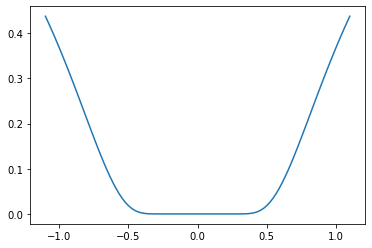

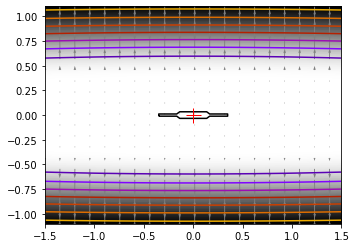

In [33]:
plt.figure(0)
plt.clf()
t = np.linspace(-1.1, 1.1, 100)
plt.plot(t, f([0, t]))

plt.figure(1)
plt.clf()
X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]
plt.imshow(f([X, Y]).T, cmap=plt.cm.gray_r, extent=[-1.5, 1.5, -1.1, 1.1],
          origin='lower')
plt.contour(X, Y, f([X, Y]), cmap=plt.cm.gnuplot)

# Plot the gradient
dX, dY = g_prime([.1*X[::5, ::5], Y[::5, ::5]])
# Adjust for our preconditioning
dX *= .1
plt.quiver(X[::5, ::5], Y[::5, ::5], dX, dY, color='.5')

# Plot our solution
plt.plot(x_min[0], x_min[1], 'r+', markersize=15)

plt.show()